In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


## *About the kernel*

* Aim of this kernel is to do exploratory data analysis (EDA) of Kaggle competition data - House Prices:Advanced Regression Techniques

* **I've explained every step in detail without making things complex, to make concepts easy to understand for beginners like me.**
* My other kernel : [titanic machine learning from disaster competition](https://www.kaggle.com/cvarun/titanic-survival-a-beginner-s-analysis)

## Importing necessary libraries

As usual, first step is to** import all necessary packages** which we'll be needing in our analysis.

In [2]:
#panel data analysis - pandas
import pandas as pd

#numpy for operations related to numpy arrays/series
import numpy as np

#matplotlib & seaborn for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
#the above line of code is a magic function, enables us to display plots within our notebooks just below the code.

#maths, stats and stuffs
from scipy import stats

**UNDERSTANDING THE DATASETS GIVEN**

* We've been given 3 files, namely "train.csv", "test.csv" & "sample_submission.csv".
* We will do our analysis on the train data.
* Based on our analysis, make our predictions for the test data.
* Generate an output file based on sample_submission data format.

Reading the train and test datas into separate dataframes, as below.

In [3]:
train_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

**INSIGHTS INTO THE DATA**

* Before begining with any analysis, it's important to have a decent knowledge about the dataset, what type of analysis on which type of data needs to be done, and what our target/objective is.

In [4]:
#.columns method gives us name of all the columns in our dataframe
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#.dtypes returns a series of all columns and their respective datatype
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [8]:
#dataframe.info() is like one stop destination for all info on metadata
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From above, it is clear that 
* Our train data has numerous columns- 81 in total
* Range of index is 1460 (this is the max no. of entries, for simplicity we'll take it as the no. of rows)
* With several columns missing many entries (null values). For eg. looking at Garage Type, it has 1379 non-null entries, meaning 81(1460-1379) null values.
* Different columns are of different datatypes, here we get a glance of which is numerical and which is categorical feature just by looking at the name of column and its data type.

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

**OUR OBJECTIVE**

* As seen in above output of **test_df.info()**, there is only 1 column missing that is the "SALE PRICE" column
* Our very obejctive is to predict that "SALE PRICE" column for the test data, based on our analysis on the train data.
* Hence, SALE PRICE is our target in this analysis.
* Our analysis majorly includes finding out, which all features (columns) have a relation to/affect the SALE PRICE column, and using those features in our prediction, eliminating rest of the columns in the process.

## **BEGIN ANALYSIS....**

**BASIC Analysis**

In [10]:
# by default it displays the first 5 records, any other integer can be specified within the parens as I did, giving 6.
train_df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [11]:
test_df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


**NUMERICAL TYPE DATA**

* Simple definition : that data which is expressed as numbers, such data have meaning on measurement, eg : height, weight, age, income, stock price etc. 

* Numerical data is further split as discrete numerical & continuous numerical.

    * Discrete numerical data takes on values that can be counted, the values are distinct, separate & the list/range of values it can take may be finite(1,2,3,4) or may go upto infinite(1,2,3,4.....). eg: no of people living in a colony.
    * Continuous numerical data can not be counted, only measured and can be described using intervals. eg: temperature of a given place, over a period.

It is a good practice to self identify columns with numerical data, looking at the values, data types. If not pandas provides us with everything.

In [12]:
#describe gives us a stats about every NUMERICAL column.
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The above is a short statistical summary of various numerical columns from the dataframe. Looking at the SALE PRICE, we get several info on it, such as :

* mean sale price is 180921.19

* sale price has a std. deviation of 79442.50. Std. deviation denotes dispersion among values, i.e by how much the values differ from the central tendency.

* min. sale price is 34900

* max is sale price is 755000



**CATEGORICAL DATA**

* The type of data which can be categorised, or the values of which can be fit into different groups/categoris is called categorical data.

* eg: gender column, where there are only 2 categories, male-female.

In [13]:
#using select_dtypes to select specified data type
train_df.select_dtypes('object').describe()   #this code gives a short statistical summary of categorical data. # object means string type here

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


The above summary of categorical vars, gives us several imp info, such as :

* Take for eg: the LotShape column:

    * It has 4 unique vales (displayed below)
    
    * With "Reg" being the top shape, which occurs 925 times out of 1460

In [14]:
# unique () used to get all distinct values from columns
train_df.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [15]:
# value_counts() is even better, gives distinct values with their frequencies.
train_df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

## **INSIGHTS USING DATA VISUALISATION**

Visualising distribution of data is best done using histograms. So what is a histogram ?

* Histogram forms bins across the range of data, and plots bars which represents the no. of data that fall within each of those bins formed.

In [16]:
num_col=train_df.select_dtypes(exclude='object')

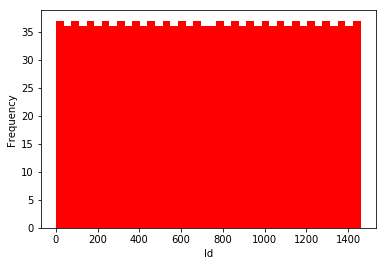

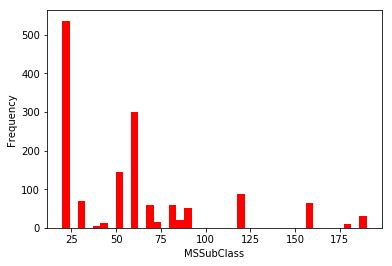

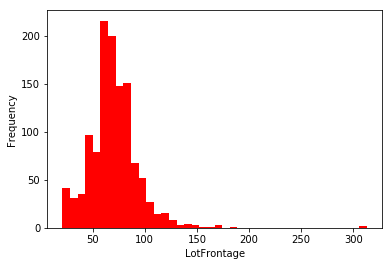

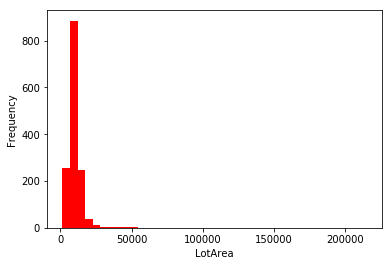

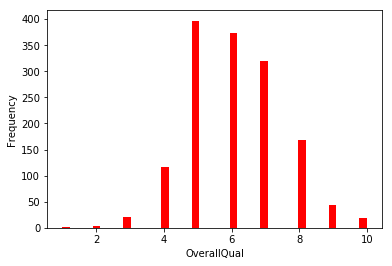

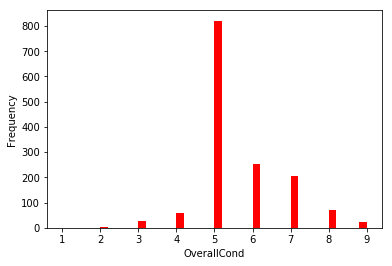

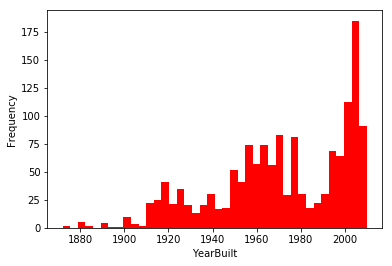

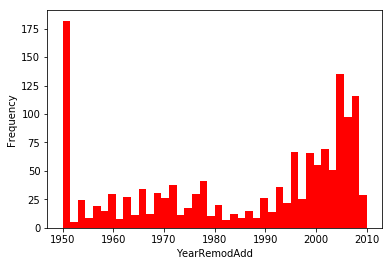

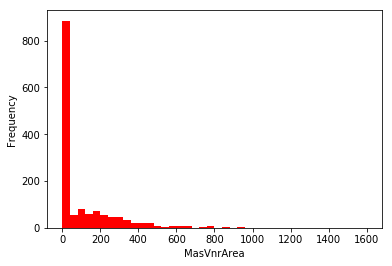

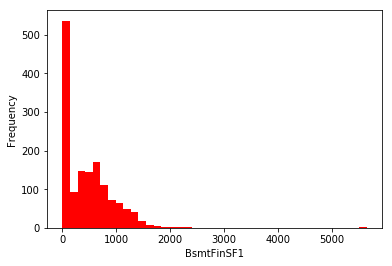

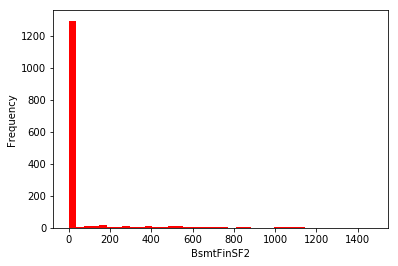

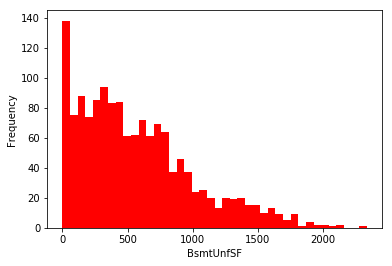

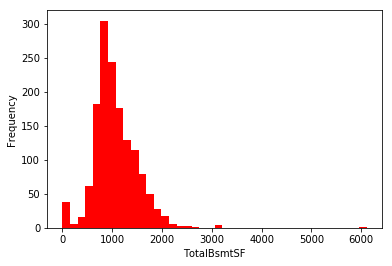

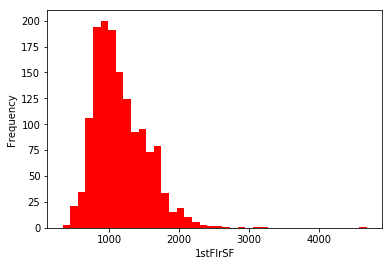

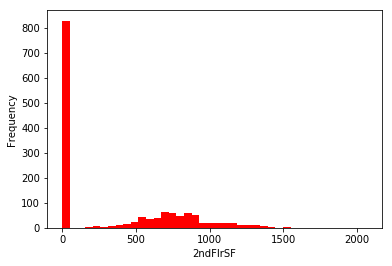

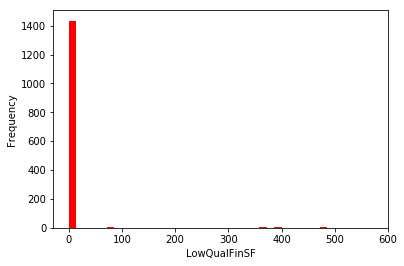

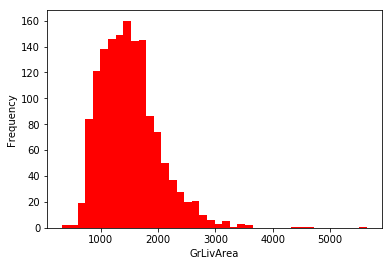

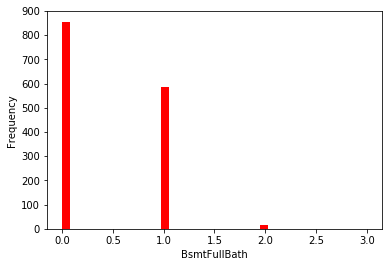

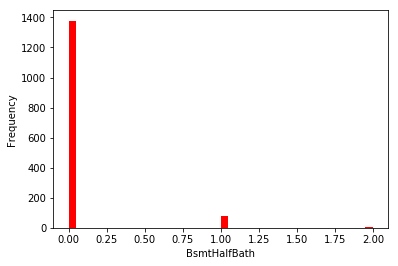

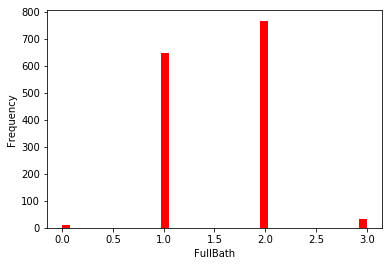

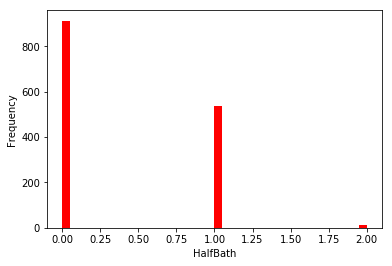

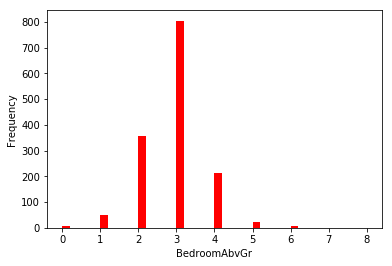

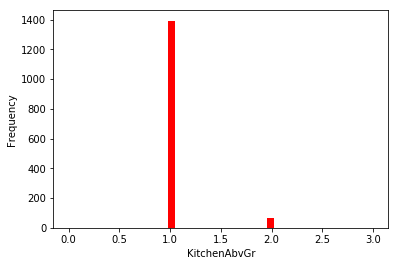

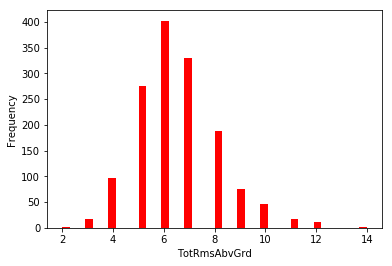

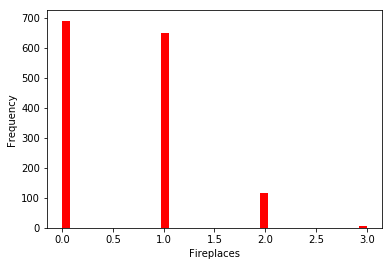

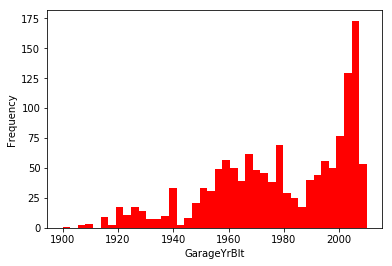

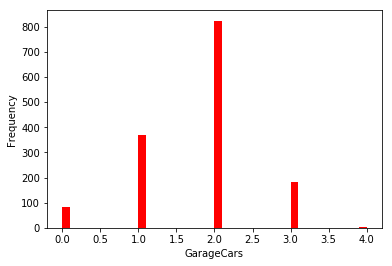

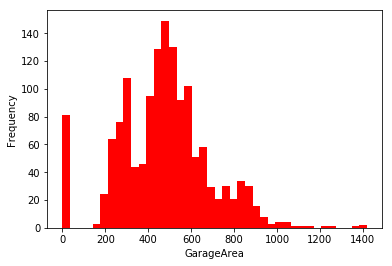

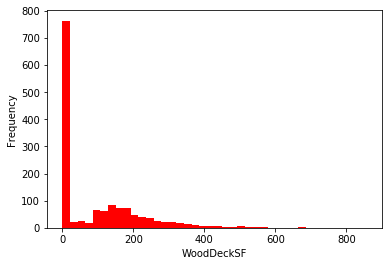

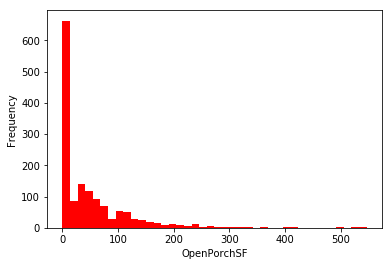

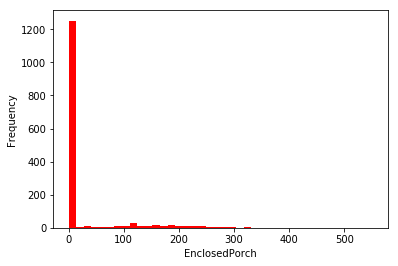

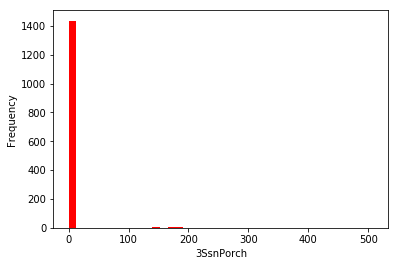

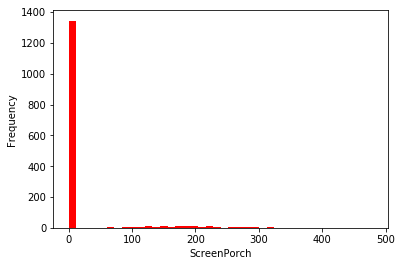

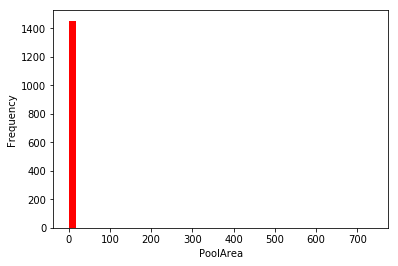

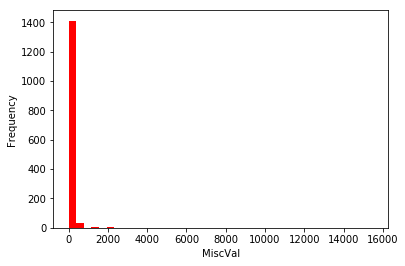

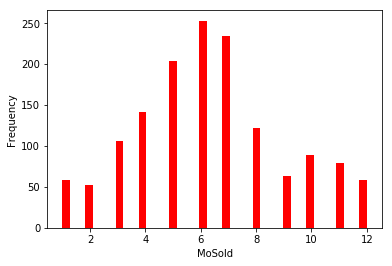

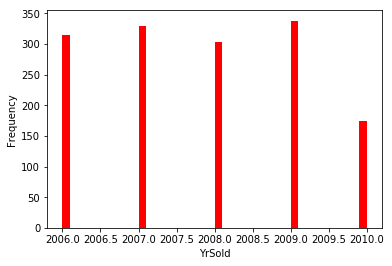

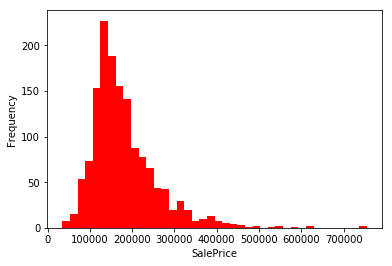

In [17]:
for i in num_col.columns:
    num_col[i].plot.hist(bins=40,color=('r'))
    plt.xlabel(i)
    plt.show()

* The above plots are all histograms.


* Looking at the above plots, it is now even clear which all feature are continuous and which ones discrete.


* eg: look at histogram plot of YearBuilt, BsmtUnfSF are continuous in range, while OverallQual, BsmtHalfBath are discrete.


* NOTE : Some of the features though may have numerical values, may come under categorical.


**Now, finding the relation of features with our target - Sale Price**

* This involves, plotting scatter plots, between our target(Sale Price) and other predictor features(other than Sale Price).

* And to analyse whether the said predictor feature has any relation to our target.

* Before that, there is way to see, if the predictor fearures are related to the target-SALEPRICE. This can be visualised using correlation heatmap.

In [18]:
# the .corr() method helps compute correlation of columns with each other, it excludes nulls automatically
corrmap=train_df.corr()

In [19]:
# .corr(), returns a correlation matrix, which is displayed below, entries are correlation values
corrmap

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


* The above correlation matrix, is really insightful but is a bit lengthy to analyse.

* But, it can be understood easily using visualisation.

* We shall now, plot the above corr. matrix using heatmap.

In [20]:
# below code is to get those features which have correlation greater than 0.5 with Target-SalePrice

best_corrd=corrmap.index[abs(corrmap['SalePrice'])>0.5] #-ve corr. value means they are correlated but inversely, still we need 'em, hence abs()
print(best_corrd)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


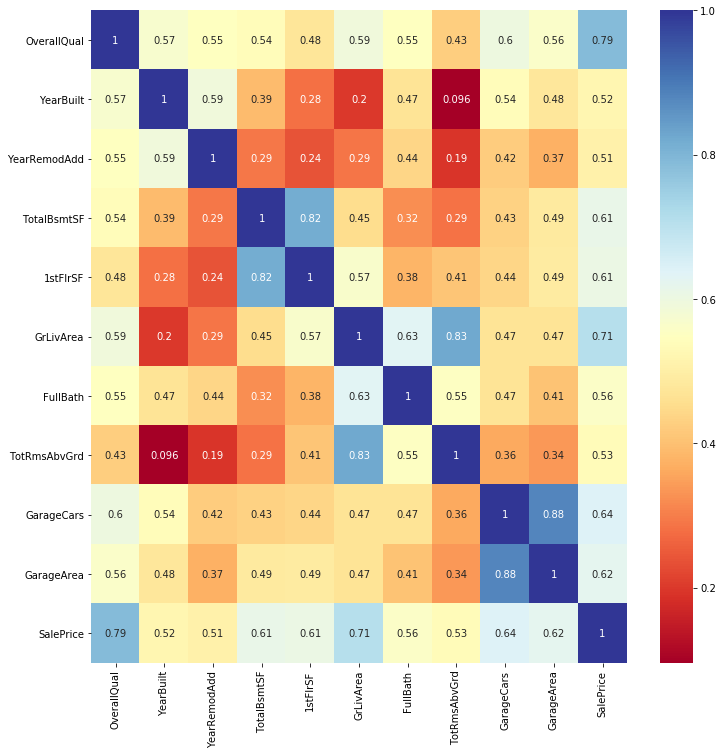

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df[best_corrd].corr(),annot=True,cmap='RdYlBu')

**There is our correlation heatmap.. Now analysing it**

* As color of the cell shifts towards blue, means it is highly correlated compared to others, to target (also indicated by the value in it)

* Looking at the map, we see :

    * *OverallQual*, *TotalBsmtSF*, *GrLivArea*, *GarageArea* are highly correlated to our target-SalePrice.
    
    

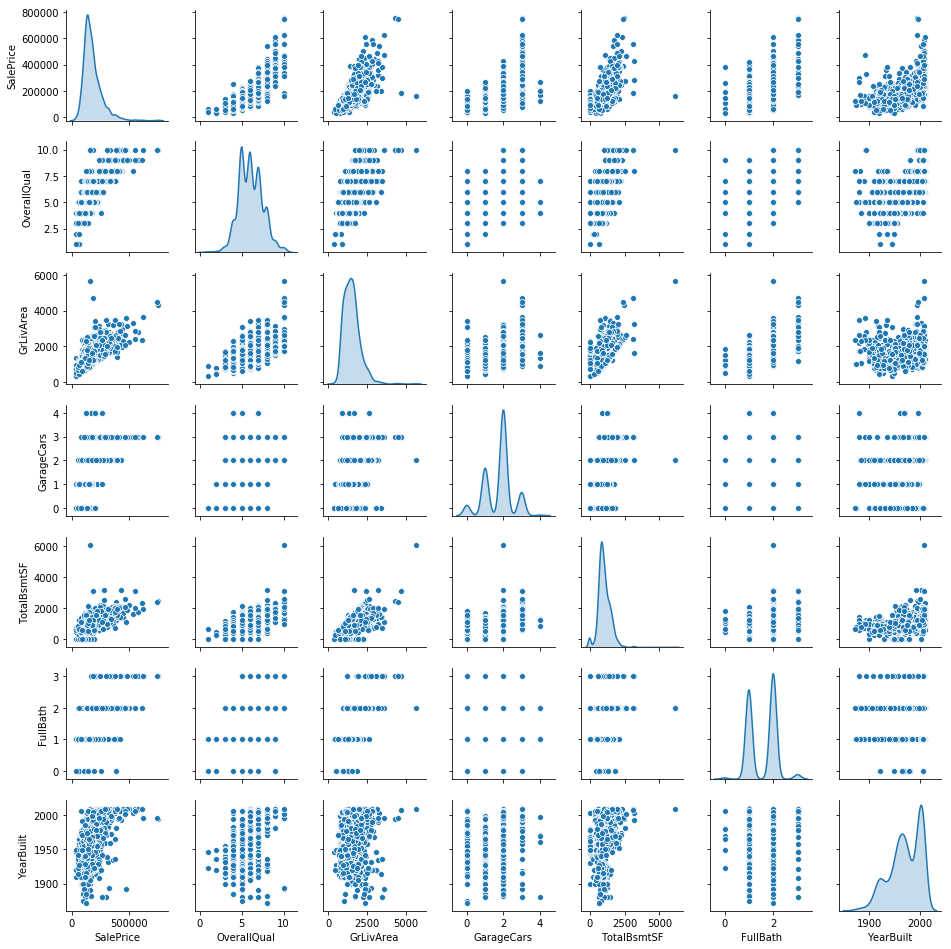

In [22]:
# all in one plot - the seaborn pairplot
col= ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[col],height=1.9,aspect=0.99,diag_kind='kde')  # for each facet -> width=aspect*height & height is in inches

The above pairplot is a informative one :

* We can analyse whether the target is normally distributed. In our case it is not, SalePrice is skewed.


* Distribution of predictor variables themselves.


* We can observe if our target-the SalePrice is linearly related to our predictor variables.

    * This linear relationship is clearly visible across most variables we plotted.


* Not only that, we can also observe MULTI-COLLINEARITY, i.e. if the the predictor variables being correlated among themselves.

    * Eg: plot between ( GrLivArea and TotalBsmtSF ), ( OverallQual and GrLivArea ) likewise.

**CHECKING RELATIONSHIP OF SAID FEATURES TO TARGET INDIVIDUALLY**

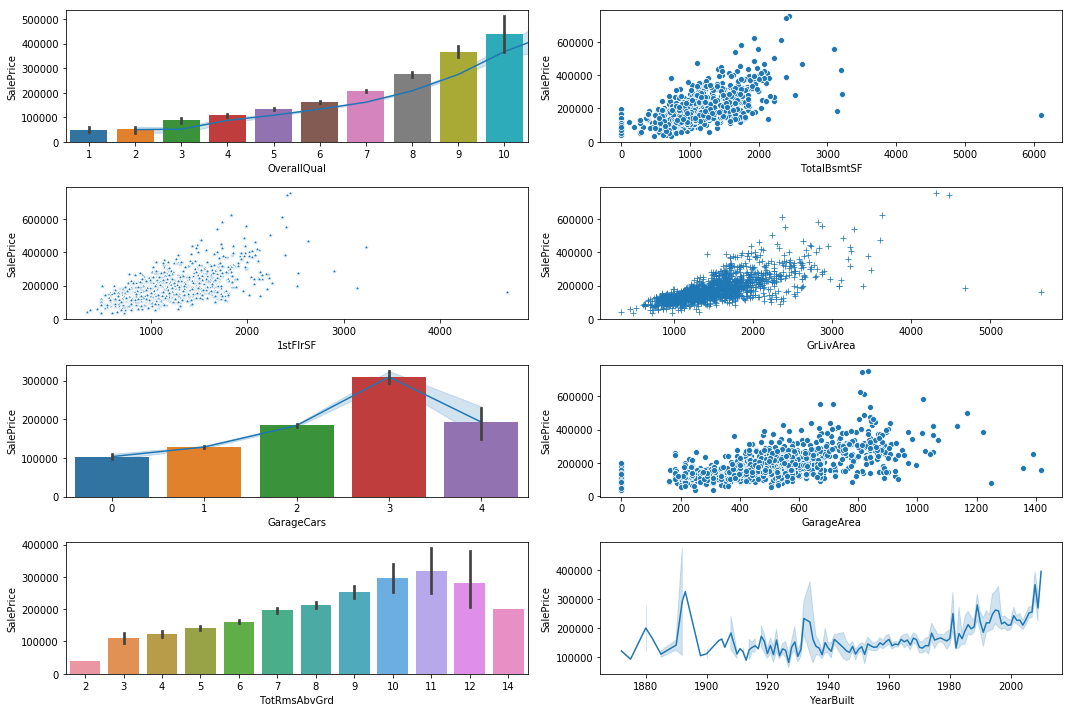

In [23]:
f,ax=plt.subplots(4,2,figsize=(15,10))    #method of matplot, allows to plot 2 or more graphs in same figure

#plotting OverallQual with SalePrice.. here both lineplot and barplot of OverallQual are plotted on same graph
sns.lineplot(train_df['OverallQual'],train_df['SalePrice'],ax=ax[0,0])
sns.barplot(train_df['OverallQual'],train_df['SalePrice'],ax=ax[0,0])

#plotting TotalBsmtSF with SalePrice..
sns.scatterplot(train_df['TotalBsmtSF'],train_df['SalePrice'],ax=ax[0,1])

#plotting 1stFlrSF with SalePrice..
sns.scatterplot(train_df['1stFlrSF'],train_df['SalePrice'],marker="*",ax=ax[1,0])    #marker is the shape of the points on scatterplot

#plotting GrLivArea with SalePrice..
sns.scatterplot(train_df['GrLivArea'],train_df['SalePrice'],marker="+",ax=ax[1,1])

#plotting GarageCars with SalePrice..
sns.lineplot(train_df['GarageCars'],train_df['SalePrice'],ax=ax[2,0])
sns.barplot(train_df['GarageCars'],train_df['SalePrice'],ax=ax[2,0])

#plotting GarageArea with SalePrice..
sns.scatterplot(train_df['GarageArea'],train_df['SalePrice'],ax=ax[2,1])

#plotting TotRmsAbvGrd with SalePrice..
sns.barplot(train_df['TotRmsAbvGrd'],train_df['SalePrice'],ax=ax[3,0])

#plotting YearBuilt with SalePrice..
sns.lineplot(train_df['YearBuilt'],train_df['SalePrice'],ax=ax[3,1])

plt.tight_layout()   #this automatically adjusts the placement of the plots in the figure area, without this, the figure labels were overlapping 

**EXPLANATION OF ABOVE PLOTS**

* OverallQual has a strong near-linear relation to the SalePrice.

* The scatter plot of TotalBsmtSF also shows relation to SalePrice, i.e as TotalBsmtSF increases, so does SalePrice.

* 1stFlrSF, GarageArea, GarageCars & GrLivArea also have a strong correlation to SalePrice.

* TotRmsAbvGrd also has a linear relation to our target !

* Looking at YearBuilt-SalePrice plot, though the relation with target is not as strong as the others, still we can see new houses have high sale price compared to older ones (with some exceptions-outliers-explained later).

## -------------------------------------

It is also important to know what the features are, a logical understanding of these features...

* Looking at GarageCars and GarageArea...
    
    * GarageCars is the number of cars that can be fitted into a given GarageArea, so basically they are the same (sum of area under all the cars = area of entire garage)... Hence we won't need both of these features, just one is enough, and we shall **retain GarageCars** since it is strongly correlated to our target than GarageArea.
    
* Looking at TotRmsAbvGrd and GrLivArea
    
    * Similarly, TotRmsAbvGrd which is Total Rooms above ground, and GrLivArea which is living area above ground, these 2 are also the same, (rooms above ground, living area above ground are ofcourse the same thing !) hence we **retain only GrLivArea**, which has higher correlation to target.
    
    
    

## **Outlier Treatment of Highly Correlated Features**

* Before we proceed, a little bit about outliers.


* Outliers are the datapoints/observations that lie outside or are far away from the main group of data. (imagine them being the odd one out in the group)

    * In above plot of SalePrice vs TotalBsmtSF, we see few dots that are away from the main group of dots, these OUTLIERS are beyond 3000 on x-axis, which have to be removed.
    
    * Similarly in SalePrice vs GrLivArea, we see few markers away from the main group, they are beyond 4000 on x-axis and need to be removed.


* Outlier treatment involves dropping those extreme values. 

In [24]:
train_df.drop(train_df[train_df.GrLivArea>4000].index, inplace = True)
train_df.drop(train_df[train_df.TotalBsmtSF>3000].index, inplace = True)
train_df.drop(train_df[train_df.GrLivArea>4000].index, inplace = True)
train_df.drop(train_df[train_df.YearBuilt<1900].index, inplace = True)  # we see peak in sale price for few houses pre 1900, hence OUTLIER

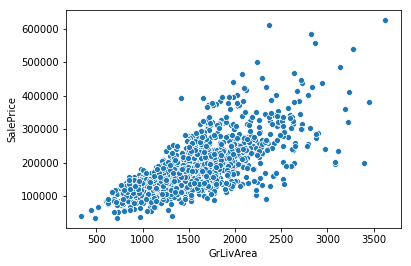

In [25]:
#post outlier treatment
sns.scatterplot(train_df.GrLivArea,train_df.SalePrice)

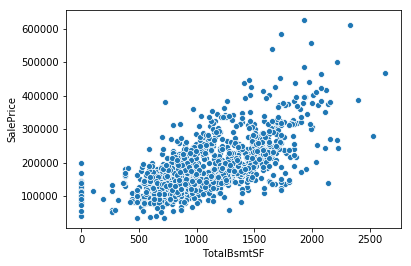

In [26]:
#post outlier treatment
sns.scatterplot(train_df.TotalBsmtSF,train_df.SalePrice)

## **Null Values Treatment**

* Null values are a hinderance in analysis and prediction, hence needs to be dealt with.

* Best way is to, replace the nulls with the central tendency or the most representative value of that variable, which may be 
    * Mean (avg) - for numerical vars.
    * Median (one at the center) - preferred where data is distorted, has outliers etc. **MEDIAN IS IMMUNE TO OUTLIERS**
    * Mode (most occuring) - preferred for categorical vars.
    

* But, clear knowledge of the data is required before replacing them with central tendency, each of which has its own drawbacks.


* Since both training and testing data has nulls, instead of treating them separately we'll combine them and treat them after taking out SalePrice out.

In [27]:
#extracting our target into separate var
y_train=train_df.SalePrice
train_df.drop(columns=['SalePrice'],inplace=True)

In [28]:
train_df.columns==test_df.columns # to show train and test datasets have similar columns, so concat them and treat nulls

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [29]:
df_merged = pd.concat([train_df, test_df], axis = 0) #axis=0 to concat along rows ; axis=1 is for columns
df_merged.shape

(2897, 80)

In [30]:
#some vars, though have numerical values but are actually categorical, so convert them
df_merged[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

In [31]:
#columns with missing values
missing_columns = df_merged.columns[df_merged.isnull().any()]
print(missing_columns)
print(len(missing_columns))

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')
34


In [32]:
#to find how many nulls
df_merged[missing_columns].isnull().sum().sort_values(ascending=False)

PoolQC          2889
MiscFeature     2793
Alley           2705
Fence           2331
FireplaceQu     1410
LotFrontage      485
GarageFinish     157
GarageYrBlt      157
GarageQual       157
GarageCond       157
GarageType       155
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType1      79
BsmtFinType2      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

* Variables with high number of null values must be dropped.


* **BUT** , in the description of dataset, it is given that nulls have meaning, eg : PoolQC (decribes pool quality), where NaN in PoolQC means there is NO POOL or 0 pool in the house, which is actually relevant data. Similarly NaN in Fence means there is NO Fence.

In [33]:
# impute by "NONE", wherever NaN means absence of that feature in the house

none_imputer = df_merged[['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in none_imputer.columns:
    df_merged[i].fillna('None', inplace = True)

In [34]:
# filling nulls in categorical vars with mode

mode_imputer =  df_merged[['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in mode_imputer.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)  #.mode()[0] because if var. is multimodal, then take the first one

In [35]:
# dealing with numericals, filling with median (robust to outliers)

median_imputer = df_merged[['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea','LotFrontage']]
for i in median_imputer.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [36]:
print(len(df_merged.columns))
print(df_merged.isnull().any().value_counts())  #checking if any nulls in any columns..

80
False    80
dtype: int64


As seen above, all nulls have been taken care of.

## **Normality of Data**

* Normality is a preferred property in analytics and modelling.
* There are many reasons for this preference, but to put simply normally distributed data makes our job easier.
* Normally distributed data is like a bell curve, symmetrical in nature.

SalePrice skew : 1.5281038501417537


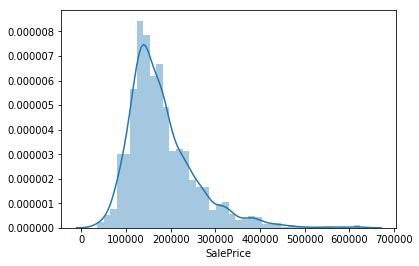

In [37]:
#checking our target variable
sns.distplot(y_train)
print('SalePrice skew :',stats.skew(y_train))

* As seen above, our target variable is not normally distributed - it ain't symmetric and also not a proper bell shape as it shows peak (pointy top).
* If skew between -0.5 and 0.5, it can be taken as near symmetrical data.
* If skew is in between (-0.5 & -1) or between (0.5 & 1), it is said to be moderately skewed.
* Where skewness is less than -1 and greater than 1, means highly skewed, such as our target SalePrice which has skew=1.5+
* However a variable which is not normally distributed or which is SKEWED may be forced to be normal by applying LOG transformation. 

SalePrice skew post transformation: 0.03358875330655675


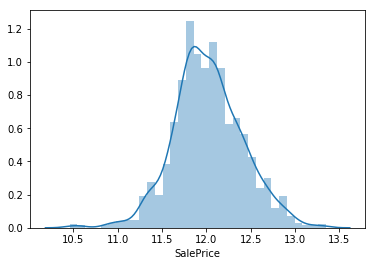

In [38]:
# applying log trnsm on saleprice
y_train=np.log1p(y_train)      #remember we imported numpy as np
sns.distplot(y_train)
print('SalePrice skew post transformation:',stats.skew(y_train))

As seen from above, now our target is forced to follow bell shape by applying log transform also, its skewness is within acceptable range now.

In [39]:
#checking skewness of other variables
skewed = pd.DataFrame(data = df_merged.select_dtypes(exclude='object').skew(), columns=['Skew']).sort_values(by='Skew',ascending=False)


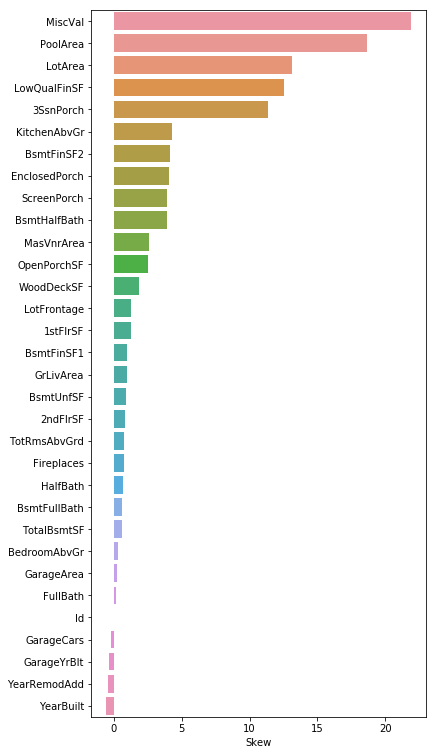

In [40]:
plt.figure(figsize=(6,13))
sns.barplot(y=skewed.index,x='Skew',data=skewed)

* As we see lot of vars have skewness more than 1, which means they are highly skewed !
* Hence we shall transform all such vars. , force them to follow normal distribution by applying log transformation.

In [41]:
#filtering numeric vars
df_merged_num = df_merged.select_dtypes(exclude='object')
df_merged_num.head(2)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,1976.0,2.0,460.0,298,0,0,0,0,0,0


In [42]:
# transforming vars where skew is high
df_trnsfmed=np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew()>0.5].index])

#other vars which have skew<0.5
df_untrnsfmd=df_merged_num[df_merged_num.skew()[df_merged_num.skew()<0.5].index]

#concat them
df_allnums=pd.concat([df_trnsfmed,df_untrnsfmd],axis=1)  #axis=1 coz conact along columns

df_merged_num.update(df_allnums)
df_merged_num.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


(2897, 32)

## **Encoding of Categorical Variables**

* We know what categorical vars are.
* We encode categorical vars, so as to make it understandable to the machine.

In [43]:
#filtering only those which are categorical in type
df_merged_cat=df_merged.select_dtypes(exclude=['int64','float64'])
df_merged_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,None,None,None,12,2008,WD,Normal


In [44]:
#encoding the vars using pandas get dummies, get_dummies encodes all cat. vars.
df_dummy_cat=pd.get_dummies(df_merged_cat)

In [45]:
#final merging of normalised numerical vars and encoded categorical vars.
df_final_merge=pd.concat([df_merged_num,df_dummy_cat],axis=1)

In [46]:
# the above final_merge contains both train & test data(remember we combined both), time to separate them now
df_train_final = df_final_merge.iloc[0:1438, :] # first 1438 rows were train data
df_test_final = df_final_merge.iloc[1438:, :]   #all rows below 1438 were test data
print(df_train_final.shape)
print(df_test_final.shape)
print(y_train.shape)      #our target from train data we separated

(1438, 349)
(1459, 349)
(1438,)


### Thats all folks !


* **Now your data is ready to be trained & tested ! Until this step, we performed what is known as pre-processing the data which is a major part of any analysis and prediction.**


* **The next step would be to import necessary suitable models, fit the training data, evaluate the model and then finally predict the  target i.e SalePrice for the test data.**

Thank you !

~ Varun